# Ceci est un titre

blabla

COUCOU




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings

warnings.filterwarnings("ignore")

In [2]:
def read_csv(file):
    return pd\
      .read_csv(file + '.csv', error_bad_lines=False, index_col=False, dtype='unicode')\
      .dropna(axis = 'columns', how = 'all')

In [35]:
def showPieQuestion(question):
  values = getCountOfColumn(question).apply(pd.Series.value_counts)
  values = np.ravel(values)

  significations = getDictSignifications(question)
  significations = list(significations['Signification'])

  nb_columns = len(significations)
  colors = cm.Spectral([float(x) / nb_columns for x in range(nb_columns)])

  fig1, ax1 = plt.subplots(figsize=(7,7))
  pie = \
    ax1.pie(
      values,
      autopct='%1.1f%%',
      startangle=30,
      colors=colors,
      radius=1
  )
  ax1.legend(
      labels=significations, 
      loc='best', 
      bbox_to_anchor=(0, 1), 
      fontsize=8
  )

  ax1.axis('equal')

  plt.show()

In [32]:
def showBarQuestion(question):
  values = getCountOfColumn(question).apply(pd.Series.value_counts)
  values = np.ravel(values)

  significations = getDictSignifications(question)
  significations = list(significations['Signification'])

  nb_columns = len(significations)

  fig1, ax1 = plt.subplots(figsize=(7,7))
  
  ax1.xaxis.set_visible(False)
  
  colors = cm.Spectral([float(x) / nb_columns for x in range(nb_columns)])
  
  bar = \
    ax1.bar(
      significations,
      values,
      label=significations,
      color=colors,
      linewidth=1,
      edgecolor='white'
  )
  ax1.legend(
      handles=bar,
      labels=significations, 
      loc='best', 
      bbox_to_anchor=(0, 1), 
      fontsize=8
  )

  plt.show()

In [ ]:
def showLineQuestion(question):
  values = getCountOfColumn(question).apply(pd.Series.value_counts)
  values = np.ravel(values)

  significations = getDictSignifications(question)
  significations = list(significations['Signification'])

  nb_columns = len(significations)

  fig1, ax1 = plt.subplots(figsize=(7,7))
  
  ax1.xaxis.set_visible(False)
  
  colors = cm.Spectral([float(x) / nb_columns for x in range(nb_columns)])
  
  bar = \
    ax1.bar(
      significations,
      values,
      label=significations,
      color=colors,
      linewidth=1,
      edgecolor='white'
  )
  ax1.legend(
      handles=bar,
      labels=significations, 
      loc='best', 
      bbox_to_anchor=(0, 1), 
      fontsize=8
  )

  plt.show()

In [5]:
def getSondageCovid(): return read_csv("Sondage_covidVague7")

In [6]:
def getDicoVariablesCovid(): return read_csv("Dico_variables_covid")

In [7]:
def getDictSignifications(label=None):
  dicoVariables = getDicoVariablesCovid()
  dicoVariables.Code = dicoVariables.Code.astype(int)
  dicoVariablesGrouped = dicoVariables.groupby(['Question_Better'])
  
  result = dict()

  for item in dicoVariablesGrouped.indices:
    result[item] = \
      dicoVariables.iloc[\
        dicoVariablesGrouped.indices[item], \
        [dicoVariables.columns.get_loc('Code'),\
         dicoVariables.columns.get_loc('Signification')]\
      ]

  return pd.DataFrame.from_dict(result[label]) \
    if label != None \
    else pd.Series(result)

In [8]:
def whereInDict(
    _dict, 
    conditionAttribute, 
    conditionOperator, 
    conditionValue
    ):
  return eval("_dict[_dict." + str(conditionAttribute) + " " + str(conditionOperator) + " " + str(conditionValue) + "]")


In [9]:
def getCountOfColumn(column):
  sondageCovid = getSondageCovid()
  return sondageCovid[[column]]

In [25]:
def showQuestionNames():
    return getDictSignifications().keys()

In [26]:
showQuestionNames()

Index(['A0_0', 'A0_1', 'A0_2', 'A1', 'A2', 'A2BIS', 'A3BIS', 'A3_0', 'A3_1',
       'A4', 'A6_0', 'A6_1', 'A6_10', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6',
       'A6_7', 'A6_8', 'A6_9', 'AGE2', 'AGGLO5', 'ALEAD65', 'ALEAD70', 'B2_0',
       'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B2_8', 'C10',
       'C11', 'C1C2', 'C3', 'C4_0', 'C4_1', 'C4_2', 'C4_3', 'C4_4', 'C4_5',
       'C4_6', 'C4_7', 'C51', 'C52', 'C53', 'C54', 'C6_0', 'C6_1', 'C6_2',
       'C6_3', 'C7', 'C7DEP', 'C7REG12', 'D60', 'D60A', 'D61', 'D62_0',
       'D62_1', 'D62_2', 'D63', 'D65', 'D66', 'D67', 'D68_0', 'D68_1', 'D68_2',
       'D68_3', 'D68_4', 'D68_5', 'D68_6', 'D68_7', 'D68_8', 'D69_0', 'D69_1',
       'D69_2', 'D69_3', 'D69_4', 'D69_5', 'D69_6', 'D69_7', 'D70', 'D71',
       'DEP', 'DEVICE', 'EMP', 'JOURV7', 'MAR', 'PCSI', 'REG12', 'SEXE'],
      dtype='object')

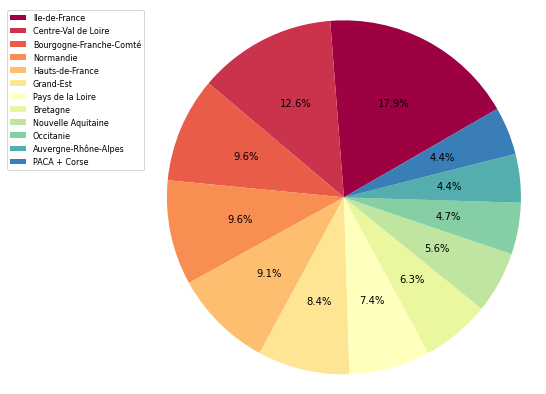

In [36]:
showPieQuestion('REG12')

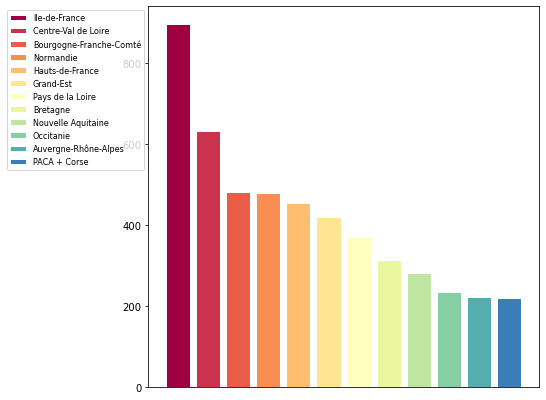

In [33]:
showBarQuestion('REG12')

In [23]:
dfCommunes = read_csv('communes-departement-region')
dfCommunes

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.1534255214,4.92611354223,1,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.0091878776,5.42801696363,2,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.9608475114,5.3729257777,4,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.9961799872,4.91227250796,5,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.7494989044,5.59432017366,6,NaN,Ambléon,Ambléon,1,Ain,84,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39196,98831,VOH,98883,OUACO,VOH,NaN,NaN,831,NaN,Voh,Voh,98,NaN,NaN,NaN
39197,98832,YATE,98834,YATE,NaN,NaN,NaN,832,NaN,Yate,Yate,98,NaN,NaN,NaN
39198,98833,KOUAOUA,98818,KOUAOUA,NaN,NaN,NaN,833,NaN,Kouaoua,Kouaoua,98,NaN,NaN,NaN
39199,98901,ILE DE CLIPPERTON,98799,ILE DE CLIPPERTON,NaN,NaN,NaN,901,NaN,Ile de clipperton,Ile de clipperton,98,NaN,NaN,NaN
